In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("cardio_base.csv")

In [120]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [122]:
df.describe(include="all")

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [123]:
df['age_years'] = (df['age'] / 365.25).astype(int)

In [124]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168,62.0,110,80,1,0,50
1,1,20228,1,156,85.0,140,90,3,0,55
2,2,18857,1,165,64.0,130,70,3,0,51
3,3,17623,2,169,82.0,150,100,1,0,48
4,4,17474,1,156,56.0,100,60,1,0,47


<Axes: ylabel='Density'>

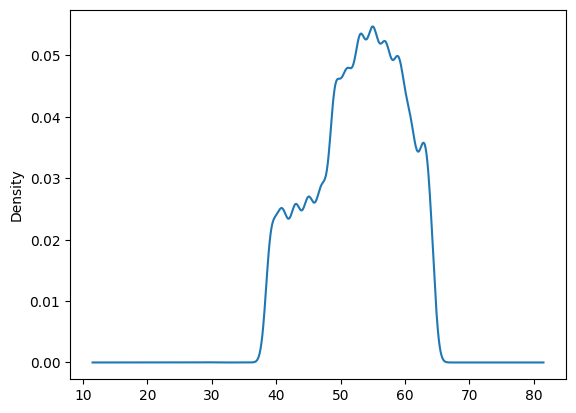

In [125]:
df["age_years"].plot.density()

<Axes: ylabel='Frequency'>

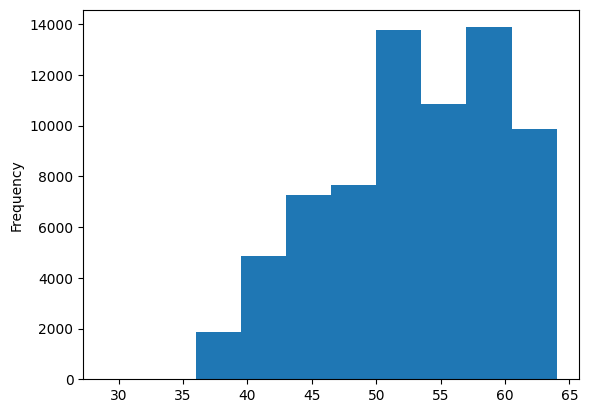

In [126]:
df["age_years"].plot.hist()

<Axes: ylabel='Frequency'>

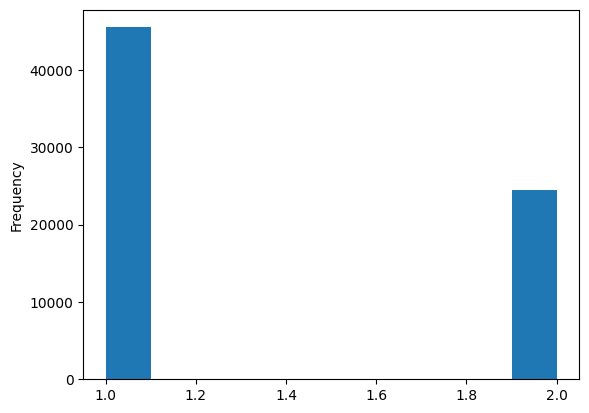

In [127]:
df["gender"].plot.hist()

In [128]:
grouped_weight_avg = df.groupby('age_years')['weight'].mean()

# Finding the highest and lowest average weights
highest_avg_weight = grouped_weight_avg.max()
lowest_avg_weight = grouped_weight_avg.min()

# Calculating the percentage difference
percentage_difference = ((highest_avg_weight - lowest_avg_weight) / lowest_avg_weight) * 100

print(f"The age group with the highest average weight is {percentage_difference:.2f}% heavier than the age group with the lowest average weight.")

The age group with the highest average weight is 28.55% heavier than the age group with the lowest average weight.


In [129]:
over_50 = df[df['gender'] > 50]
under_or_50 = df[df['gender'] <= 50]

# Calculate the average cholesterol levels for both groups
avg_cholesterol_over_50 = over_50['cholesterol'].mean()
avg_cholesterol_under_or_50 = under_or_50['cholesterol'].mean()

# Printing the results
print(f"Average cholesterol level for people over 50: {avg_cholesterol_over_50}")
print(f"Average cholesterol level for people 50 or younger: {avg_cholesterol_under_or_50}")

percentage_increase = ((avg_cholesterol_over_50 - avg_cholesterol_under_or_50) / avg_cholesterol_under_or_50) * 100


# Determine if people over 50 have higher average cholesterol levels
if avg_cholesterol_over_50 > avg_cholesterol_under_or_50:
    print("Yes, people over 50 have higher average cholesterol levels than the rest.")
    print(f"The average cholesterol level for people over 50 is {percentage_increase:.2f}% higher than for those 50 years old or younger.")
else:
    print("No, people over 50 do not have higher average cholesterol levels than the rest.")

Average cholesterol level for people over 50: nan
Average cholesterol level for people 50 or younger: 1.3668714285714285
No, people over 50 do not have higher average cholesterol levels than the rest.


In [130]:
# Assuming df is your DataFrame after reading the CSV file
# df = pd.read_csv("path_to_your_file/cardio_base.csv")

# Count the total number of men and women
total_men = df[df['gender'] == 2].shape[0]
total_women = df[df['gender'] == 1].shape[0]

# Count the number of smokers within each gender
smokers_men = df[(df['gender'] == 2) & (df['smoke'] == 1)].shape[0]
smokers_women = df[(df['gender'] == 1) & (df['smoke'] == 1)].shape[0]

# Calculate the proportion of smokers in each gender
proportion_smokers_men = smokers_men / total_men
proportion_smokers_women = smokers_women / total_women

print(f"Proportion of smokers among men: {proportion_smokers_men:.2f}")
print(f"Proportion of smokers among women: {proportion_smokers_women:.2f}")

times_more_likely = proportion_smokers_men / proportion_smokers_women


# Determine if men are more likely to be smokers than women
if proportion_smokers_men > proportion_smokers_women:
    print("Yes, men are more likely to be smokers than women.") 
    print(f"Men are {times_more_likely:.0f} times more likely to be smokers than women.")
else:
    print("No, men are not more likely to be smokers than women.")


Proportion of smokers among men: 0.22
Proportion of smokers among women: 0.02
Yes, men are more likely to be smokers than women.
Men are 12 times more likely to be smokers than women.


In [131]:
# Calculate the 99th percentile for height
height_99th_percentile = df['height'].quantile(0.99)

print(f"The tallest 1% of people are at least {height_99th_percentile:.2f} cm tall.")


The tallest 1% of people are at least 184.00 cm tall.


In [132]:
df2 = df.drop("age", axis=1)
# Calculate Spearman rank correlation matrix
spearman_corr_matrix = df2.corr(method='spearman')

# Fill the diagonal with NaN values to ignore self-correlations
np.fill_diagonal(spearman_corr_matrix.values, np.nan)

# Find the pair with the highest correlation excluding self-correlations
max_corr_value = spearman_corr_matrix.unstack().dropna().max()
max_corr_pair = spearman_corr_matrix.unstack().idxmax()

print(f"The two features with the highest Spearman rank correlation are: {max_corr_pair} with a correlation of {max_corr_value:.2f}")


The two features with the highest Spearman rank correlation are: ('ap_hi', 'ap_lo') with a correlation of 0.74


In [133]:
spearman_corr_matrix

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
id,NaN,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,-0.003697,0.003006
gender,0.003506,NaN,0.533805,0.172480,0.063174,0.066374,-0.035730,0.338135,-0.020529
height,-0.001886,0.533805,NaN,0.313569,0.019381,0.030534,-0.058940,0.197632,-0.083399
weight,-0.001292,0.172480,0.313569,NaN,0.277749,0.254420,0.137908,0.071676,0.062961
ap_hi,0.003258,0.063174,0.019381,0.277749,NaN,0.735436,0.208722,0.028929,0.220327
ap_lo,-0.000238,0.066374,0.030534,0.254420,0.735436,NaN,0.167401,0.026172,0.157721
cholesterol,0.005706,-0.035730,-0.058940,0.137908,0.208722,0.167401,NaN,0.015220,0.141547
smoke,-0.003697,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,NaN,-0.047191
age_years,0.003006,-0.020529,-0.083399,0.062961,0.220327,0.157721,0.141547,-0.047191,NaN


<Axes: ylabel='Density'>

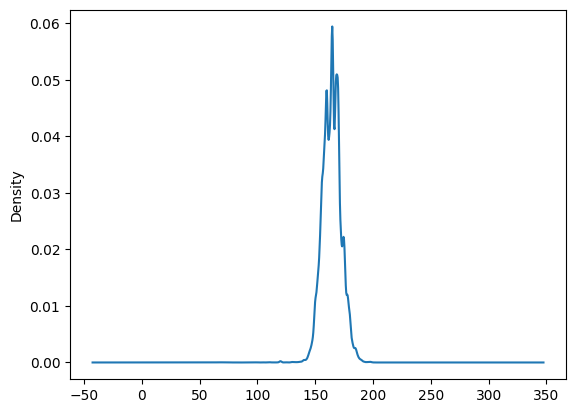

In [134]:
df["height"].plot.density()

<Axes: ylabel='Frequency'>

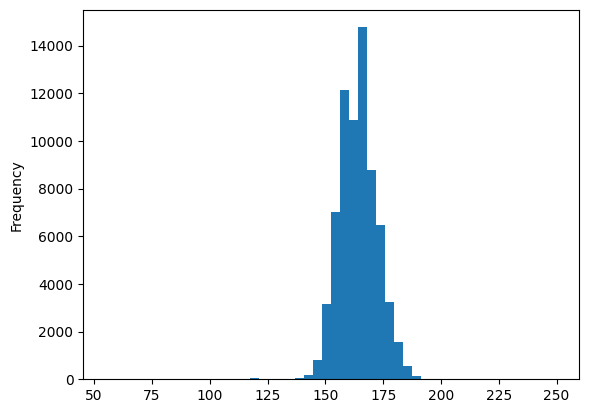

In [135]:
df["height"].plot.hist(bins=50)

In [136]:
# Calculate the mean and standard deviation of height
mean_height = df['height'].mean()
std_height = df['height'].std()

# Calculate the lower and upper bounds for being within 2 standard deviations
lower_bound = mean_height - 2 * std_height
upper_bound = mean_height + 2 * std_height

# Count how many people fall outside of these bounds
outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]

# Calculate the percentage of these outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f"Percentage of people more than 2 standard deviations away from the average height: {percentage_outliers:.2f}%")


Percentage of people more than 2 standard deviations away from the average height: 3.34%


In [137]:
cardio_alco_df = pd.read_csv("cardio_alco.csv", sep=';')

In [138]:
cardio_alco_df.head()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [139]:
merged_df = pd.merge(df, cardio_alco_df, on='id', how='inner')


In [145]:
merged_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,alco
0,44,14605,1,159,60.0,110,70,1,0,39,0
1,45,20652,1,160,73.0,130,85,1,0,56,0
2,46,21940,2,173,82.0,140,90,3,0,60,0
3,47,20404,1,163,55.0,120,80,1,0,55,0
4,49,18328,2,175,95.0,120,80,1,0,50,0


In [141]:
print(merged_df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
age_years      0
alco           0
dtype: int64


In [144]:
# Filter for people over 50 years old
merged_over_50_df = merged_df[merged_df['age_years'] > 50]

# Calculate the percentage of people over 50 who consume alcohol
percentage_alco_over_50 = (merged_over_50_df['alco'].sum() / len(merged_over_50_df)) * 100

print(f"Percentage of the population over 50 years old that consume alcohol: {percentage_alco_over_50:.2f}%")

Percentage of the population over 50 years old that consume alcohol: 4.91%


In [147]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame after merging with the alcohol consumption data
# df = pd.read_csv("path_to_your_merged_dataset.csv")

# 1. Men have higher blood pressure than women
# Assuming ap_hi for systolic blood pressure
men_bp = df[df['gender'] == 2]['ap_hi']
women_bp = df[df['gender'] == 1]['ap_hi']
t_stat_bp, p_val_bp = ttest_ind(men_bp, women_bp)

# 2. Smokers have higher blood pressure than non-smokers
smokers_bp = df[df['smoke'] == 1]['ap_hi']
non_smokers_bp = df[df['smoke'] == 0]['ap_hi']
t_stat_smoke_bp, p_val_smoke_bp = ttest_ind(smokers_bp, non_smokers_bp)

# 3. Smokers have higher cholesterol level than non-smokers
smokers_chol = df[df['smoke'] == 1]['cholesterol']
non_smokers_chol = df[df['smoke'] == 0]['cholesterol']
t_stat_chol, p_val_chol = ttest_ind(smokers_chol, non_smokers_chol)

# 4. Smokers weigh less than non-smokers
smokers_weight = df[df['smoke'] == 1]['weight']
non_smokers_weight = df[df['smoke'] == 0]['weight']
t_stat_weight, p_val_weight = ttest_ind(smokers_weight, non_smokers_weight)

# Printing the p-values to interpret the tests
print(f"Men vs. Women BP (p-value): {p_val_bp}")
print(f"Smokers vs. Non-smokers BP (p-value): {p_val_smoke_bp}")
print(f"Smokers vs. Non-smokers Cholesterol (p-value): {p_val_chol}")
print(f"Smokers vs. Non-smokers Weight (p-value): {p_val_weight}")


Men vs. Women BP (p-value): 0.11209623659243896
Smokers vs. Non-smokers BP (p-value): 0.8072768742643271
Smokers vs. Non-smokers Cholesterol (p-value): 0.006152424413599285
Smokers vs. Non-smokers Weight (p-value): 4.517830901143157e-72
